In [1]:
import matplotlib.pyplot as plt
# import matplotlib.finance as mpf
#from matplotlib import finance as mpf
import mpl_finance as mpf
import numpy as np
import pandas as pd
from matplotlib.pylab import date2num
import matplotlib.ticker as ticker
from pandas import datetime
import time

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 支持中文 负号
#定义 字体的颜色等等
font = {
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 20,
        }

D:\Anaconda\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [2]:
def get_K(code,title):
    data=pd.read_csv(code+".csv")
    data = data[data["trade_date"]> 20190228]
    data['trade_date'] = data['trade_date'].map(lambda x:datetime.strptime(str(x),'%Y%m%d'))
    data[data['vol']==0]=np.nan
    data=data.dropna()

    data.sort_values(by='trade_date',ascending=True,inplace=True)
    # 原始的csv 读入进来 DataFrame 的 columns 顺序不符合candlestick_ochl 要求的顺序
    # columns 的顺序一定是 date, open, close, high, low, volume
    # 这样才符合 candlestick_ochl 绘图要求的数据结构

    data=data[['trade_date','open','close','high','low','vol']] # 改变列顺序符合K线的计算

    # 生成横轴的刻度名字
    date_tickers=data.values

    weekday_quotes=[tuple([i]+list(quote[1:])) for i,quote in enumerate(data.values)]
    #print(weekday_quotes)

    fig,ax=plt.subplots(figsize=(1200/72,400/72))
    def format_date(x,pos=None):
        if x<0 or x>len(date_tickers):
            return '' 
        return date_tickers[int(x)][0].strftime("%Y-%m-%d")
        
    
    ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
    ax.grid(True)
    # fig.autofmt_xdate()

    mpf.candlestick_ochl(ax,weekday_quotes,colordown='green', colorup='red',width=0.6)
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus']=False
    plt.title(title+"的K线图",fontdict=font)
    plt.tick_params(labelsize=16) 
    plt.show()

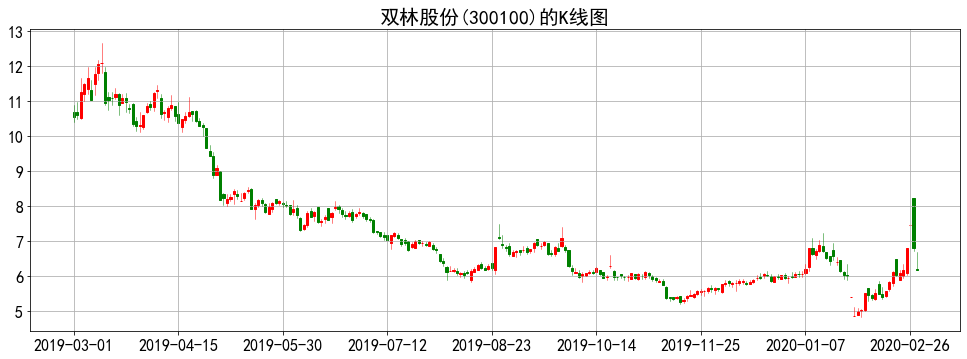

In [4]:
get_K("300100","双林股份(300100)")

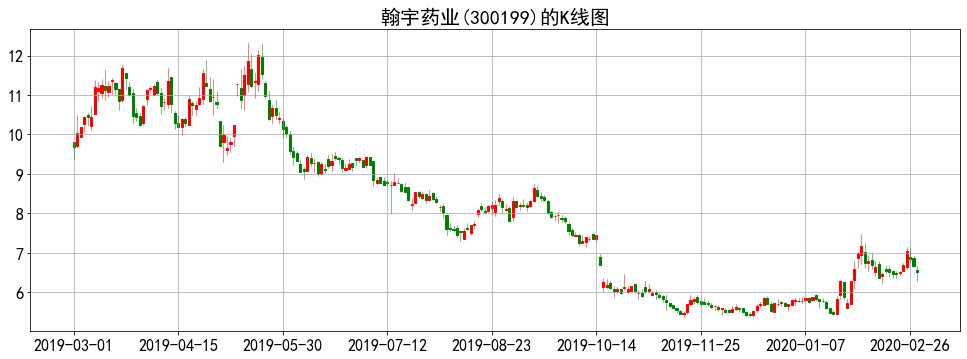

In [5]:
get_K("300199","翰宇药业(300199)")

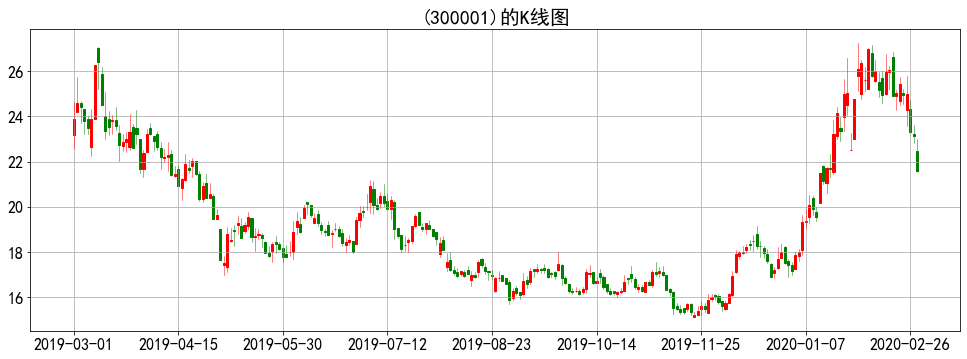

In [6]:
get_K("300001","(300001)")

In [18]:
len(df)

NameError: name 'df' is not defined